# Mini Programming Assignment: Implement a Greedy Algorithm

**Name:** Ben Prescott

**Date:** 08/15/2021

**Course:** MSDS432 Summer 2021

#### Executive Summary

**Description:**

A company recently won a contract that requires 24x7 security. The current staff is made up of 6 security guards who each receive a standard $15 per hour, unless they work 8 hours in a day, in which they would make $20 per hour (overtime). This assignment focuses on creating a greedy algorithm to define hour assignments for security personnel to meet the 24x7 requirement, while keeping the cost of the guards to a minimum. 

Given we have 6 staff to cover 168 working hours each week (24 hours per day x 7 days per week), we can quickly determine we can keep everyone from burning overtime hours. However, the goal is to create an algorithm to find a way to meet this objective. 

**Explain your algorithm in detail.  How is it greedy?**

Prior to defining a greedy algorith a few assumptions about the workers were made.

- the usage of workers did not require each to fulfill an 8 hour work day
- not all workers had to obtain the same weekly hours
- each worker should be used regardless of availability remaining from others

Using these assumptions, I created an algorithm that assigns the maximum shift duration (8 hours) to each person in a round robin format. The algorithm takes a list of worker names and an integer for the number of days needing workers scheduled for. It then returns a dictionary with the keys being each worker's name, and the values being the number of hours assigned over the number of days needing scheduling. 

This algorithm is considered greedy due to its approach of always scheduling the maximum hours before incurring overtime pay, using a round robin approach. The algorithm doesn't look at which specific day of the week the hours belong to, or if theres an approach to balance hour assignments to all workers. Instead, it only cares about assigning 8 hour blocks through the list of names until the maximum hours has been reached. It also does not work efficiently for half days or odd hour requirements, as it may assign more hours to each individual than what is needed. 

**What is the complexity of your solution?**

To test complexity I ran a loop that recorded the execution time from a 1 day need to 16 day need. The complexity of this algorithm would be $O(n)$, as the execution times for each added day increase linearly. I'm not certain why the 1 day need took as long as it did, but testing the need for 2 - 16 days showed it to be $O(n)$. 

**Did the greedy algorithm provide the best solution or could there be an alternative/better solution to your problem?  Why or why not?**

I kept the algorithm in a state that assigns 8 hour blocks to each individual. This method does provide a feasible solution for both 7 day and 1 day needs. However, it could be changed to assign in 1 hour blocks reducing the error in situations not divisible by 8. Overall, for this specific need, I do believe it provided a reasonable solution without having more information on workers and what is acceptable from a scheduling perspective.  

**If the scenario had different values for the inputs would your algorithm still be successful?  Eg. higher overtime, shorter shifts, or values that don't factor so nicely.  Why or why not?**  

In the case of half days or odd hour requirements, the algorithm would still assign hours ensuring the shifts don't exceed 8 hours, but would provide too many hours in the event it can't factor evenly into the needed hours. For example, if the need is for 5.5 days it will end up assigning 136 hours worth across the 6 workers, where the need is 132 total hours. 

The algorithm can be shifted to assign 1 hour at a time (or even less than that) until all necessary hours are consumed. However, this adds complexity to requirements such as 1 day, as it will evenly spread the hours across all 6 workers, using 6 different workers for a 24 hour shift.  This becomes worse as the days needing filled becomes smaller (such as only needing a half day), as it will use all 6 workers with 2 hour shifts. 

**What things would change the optimal output?**

More refinement in creating a schedule and incrementing up to 8 hours for each person on each day, moving on to the next day and the next unassigned person once a single day's schedule is full. This would follow the switch from 8 hour increments to 1 hour as mentioned earlier, allowing for the creation of an actualy daily schedule rather than total assigned hours. 

**If you were not constrained to a greedy algorithm, what approaches would you take to solve the problem? **

To piggyback off the last response, I would look to add more detail to each worker that can be used in the algorithm. For example, I would create shifts and assign it as a value to each worker as if they were hired on for a specific shift (1st, 2nd, etc.). I would then create an algorithm that looks at the shift needing filled for a particular day, and the total assigned hours for the individuals contracted for those shifts, then assigns the individual needing the next shift. 

In [378]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from timeit import default_timer as timer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
np.set_printoptions(suppress=True)
plt.style.use('ggplot')

In [570]:
# Creating a fictional set of of security guards
workers = ['Bob', 'Susan', 'Carol', 'Alex', 'Brady','Cooper']

In [597]:
# Defining a function to allocate hours to each guard on a rotational basis
def guard_schedule(workers: list, days_needed: int) -> dict:
    schedule = defaultdict(int)
    guardlist = workers
    worker_index = int(len(workers))
    needed_hours = days_needed * 24
    guard_num = 0
    while needed_hours > 0:
        schedule[guardlist[guard_num]] += 8
        needed_hours -= 8
        guard_num = (guard_num + 1) % worker_index
    return dict(schedule)

In [608]:
# Creating a list to store execution times
execution_times = []

# Looping over 7 days and recording the algorithm execution time for each need 
for d in range(1,17):
    start = timer()
    output = guard_schedule(workers,d)
    end = timer()
    execution_times.append(end-start)

In [589]:
# Storing the weekly and daily hour allotments
weekly_output = guard_schedule(workers,7)
daily_output = guard_schedule(workers,1)

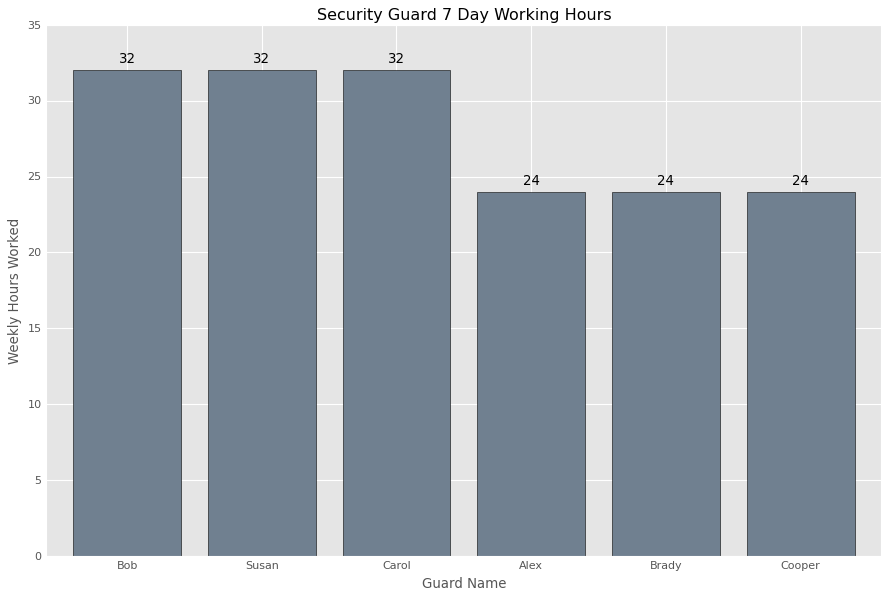

In [590]:
plt.figure(figsize=(12,8))
plt.bar(weekly_output.keys(),weekly_output.values(), edgecolor='black', color='slategray')
plt.title('Security Guard 7 Day Working Hours')
plt.xlabel('Guard Name')
plt.ylabel('Weekly Hours Worked')
plt.xlim(left = -.6)
plt.xlim(right = 5.6)
for i,d in enumerate(weekly_output.values()):
    plt.text(x=i , y =d+.5 , s=f"{d}" , fontdict=dict(fontsize=12), ha='center')
plt.plot();

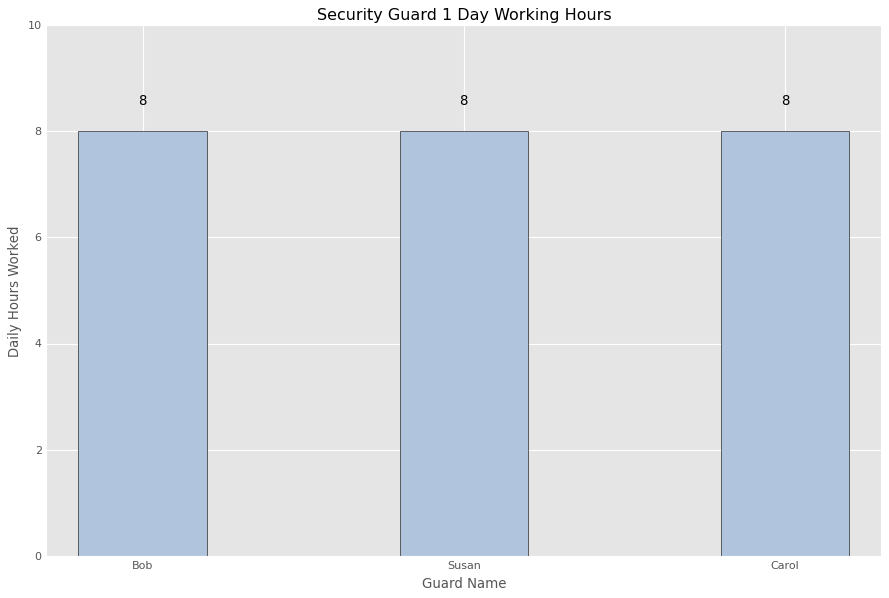

In [591]:
plt.figure(figsize=(12,8))
plt.bar(daily_output.keys(),daily_output.values(), edgecolor='black', color='lightsteelblue', width=.4)
plt.title('Security Guard 1 Day Working Hours')
plt.xlabel('Guard Name')
plt.ylabel('Daily Hours Worked')
plt.ylim(top=10)
plt.xlim(left = -.3)
plt.xlim(right = 2.3)

for i,d in enumerate(daily_output.values()):
    plt.text(x=i , y =d+.5 , s=f"{d}" , fontdict=dict(fontsize=12), ha='center')
plt.plot();

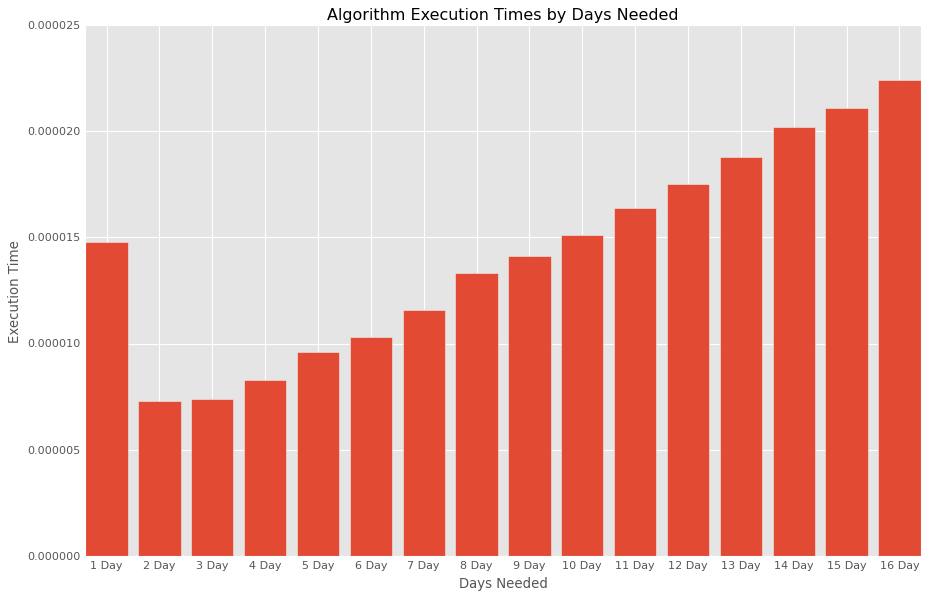

In [610]:
xval = ['{} Day'.format(i) for i in range(1,17)]

plt.figure(figsize=(12,8))
plt.bar(xval, execution_times)
plt.title('Algorithm Execution Times by Days Needed')
plt.xlabel('Days Needed')
plt.ylabel('Execution Time')
plt.xticks(xval)
plt.plot();